In [32]:
# importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
netflix = pd.read_csv('/content/netflix_titles.csv')
netflix.head() # Exploring the first few rows of the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [34]:
# Dropping the show_id column
netflix = netflix.drop(columns=('show_id'))
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [35]:
netflix.info() # exploring an overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [36]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [37]:
netflix.isnull().sum() # examining the missing values in the dataset

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [40]:
# dropping the few null rows
netflix = netflix.dropna(subset=['date_added', 'rating', 'duration'])
#netflix[['date_added', 'rating', 'duration']]=netflix[['date_added', 'rating', 'duration']].dropna()

In [12]:
# filling the null rows in the director column
netflix['director'] = netflix['director'].fillna('None Specified')

In [13]:
netflix['cast'] = netflix['cast'].fillna('Not Listed')

In [14]:
netflix['country'] = netflix['country'].fillna('Not Specified')

In [15]:
# Ensuring there are no missing values
netflix.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [41]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [42]:
netflix['Min']= netflix['duration'].str.strip('min')[0]
netflix['season']= netflix['duration'].str.strip('Seasons')[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Min,season
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,90 mi
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",90,90 mi


In [50]:
netflix['duration'].value_counts()

1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [51]:
# Converting the duration to an interger
netflix['duration'] = netflix['duration'].str.strip('min')
netflix['duration'] = netflix['duration'].str.strip('Seasons')
netflix['duration'] = netflix['duration'].str.strip('Seaso')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [52]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Min,season
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",90,90 mi
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",90,90 mi
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,90,90 mi
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",90,90 mi
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,90,90 mi


In [49]:
netflix['duration'].value_counts()

1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [ ]:
# removing the extra whiite spaces and converting to an integer
netflix['duration'] = netflix['duration'].str.strip(' ').astype('int')

In [ ]:
netflix['duration'].value_counts()


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,None Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,None Specified,Not Listed,Not Specified,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,None Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Specified,"September 24, 2021",2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Not Specified,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
netflix['type'].value_counts() 

Movie      6126
TV Show    2664
Name: type, dtype: int64

## top directors and number of movies along the years 

In [53]:
netflix['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4526, dtype: int64

In [54]:
netflix['director'].value_counts()[0]

19

In [56]:
temp = netflix [netflix['director']=='Rajiv Chilaka']

In [59]:
temp['release_year'].value_counts()

2013    6
2012    4
2011    3
2009    2
2010    2
2018    2
Name: release_year, dtype: int64

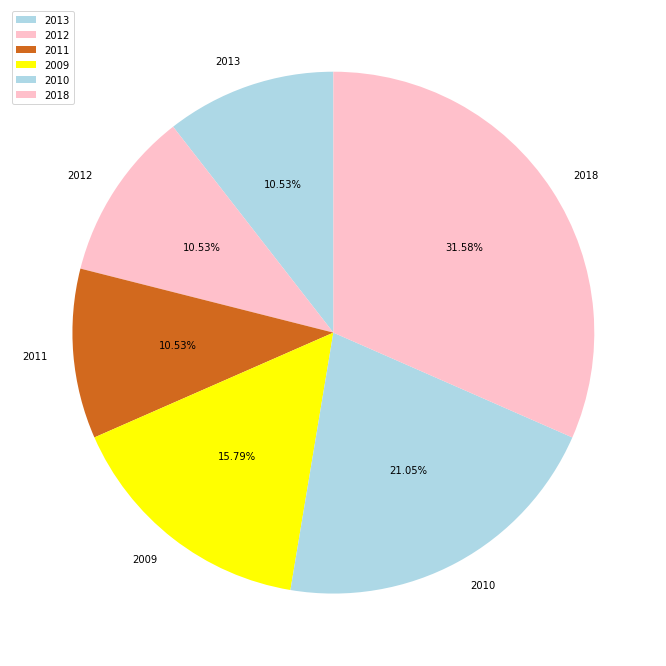

In [84]:
labels=temp['release_year'].value_counts().index

plt.pie(temp['release_year'].value_counts().sort_values(),labels=labels,
        autopct='%1.2f%%',colors=['lightblue','pink', 'chocolate','yellow'], startangle=90)
plt.legend();

## Top10 Genre in Movies


In [65]:
df_movies= netflix[netflix['type']=='Movie']

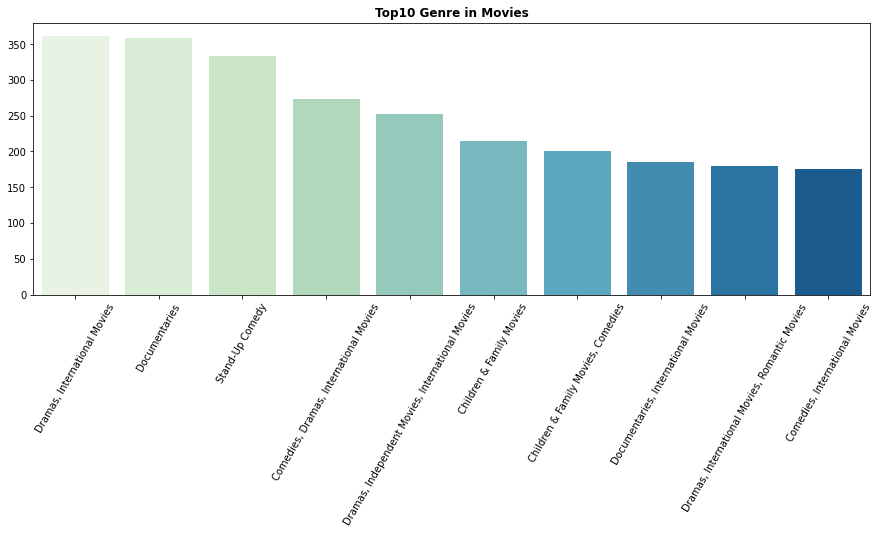

In [70]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="GnBu")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

## Top10 Genre in TV Shows

In [72]:
df_tv= netflix[netflix['type']=='TV Show']

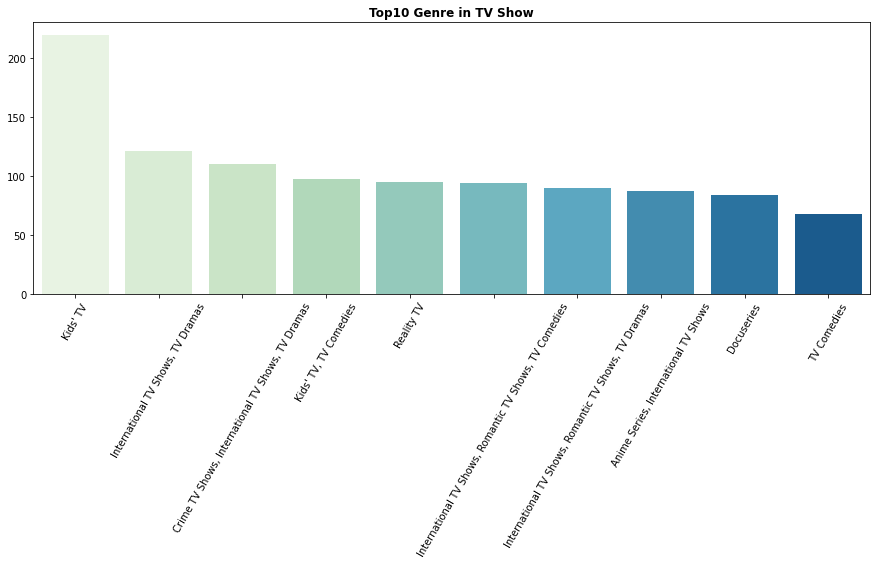

In [73]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="GnBu")
plt.xticks(rotation=60)
plt.title("Top10 Genre in TV Show",fontweight="bold")
plt.show()

## World Cloud-Movie Genre

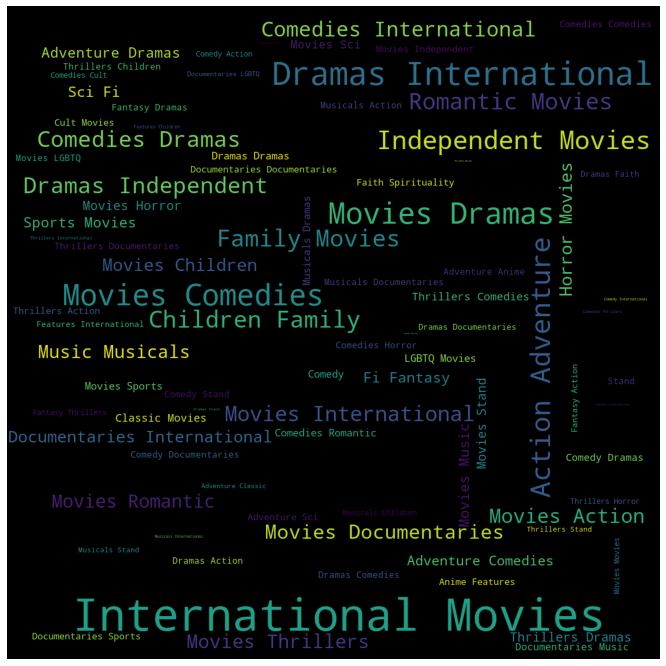

In [77]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## World Cloud-TV-show Genre

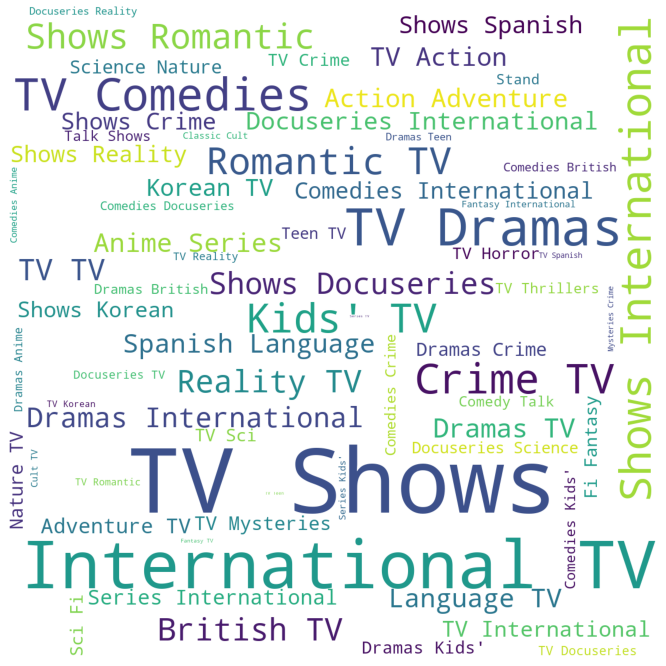

In [75]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Rating Movies

In [85]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

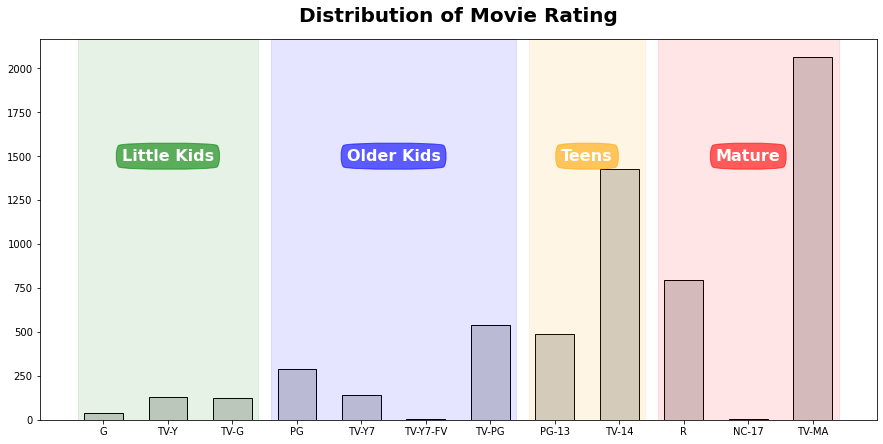

In [86]:
rating_barplot(movie_rating,'Movie', 1500)

## Rating TV-shows

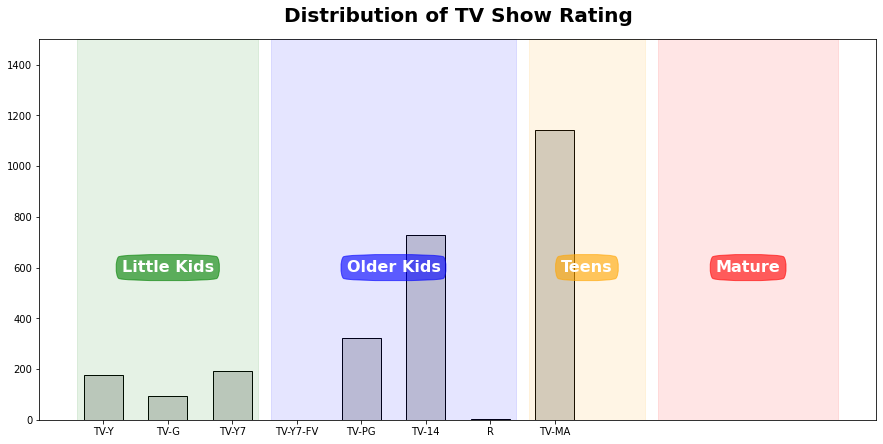

In [87]:
rating_barplot(tv_rating,'TV Show' , 600, 1500)

## How many movies each year

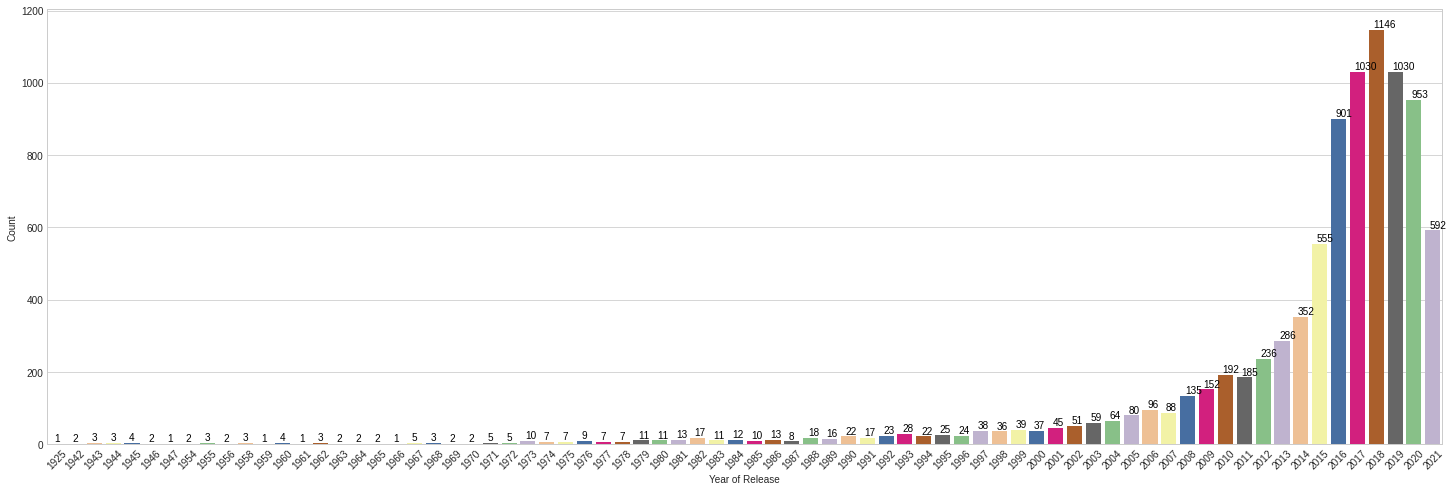

In [88]:
plt.figure(figsize = (25, 8))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'release_year', data = netflix, palette = "Accent")
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')


## summary of the Movies 

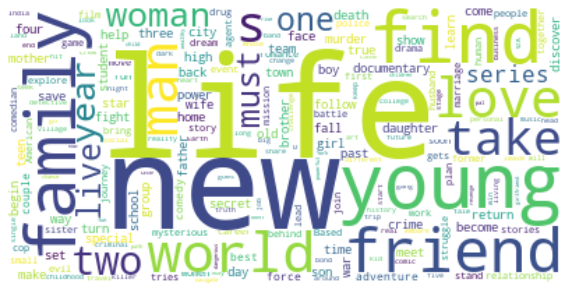

In [90]:
text = " ".join(description for description in netflix.description)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (10, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## Distribution of  Movies and Series

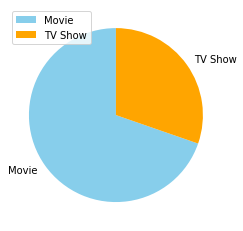

In [ ]:
plt.pie(netflix['type'].value_counts(), 
        labels=netflix['type'].value_counts().index,
        colors=['skyblue', 'orange'], startangle=90
        
       )
plt.legend();

In [ ]:
# This pie chart shows that there are a lot more movies produced than tv shows

## Movie subset

In [ ]:
# subset the data to only include movies
netflix_movie = netflix[netflix['type'] == 'Movie']
netflix_movie.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Not Specified,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


## Top directors

In [ ]:
# getting the counts of directors in the dataset
netflix['director'].value_counts()

None Specified                    2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

In [ ]:
# Split the movie directors to only include 1 name
movie_directors = netflix_movie['director'].str.split(',', expand=True).stack()
# convert to a dataframe
movie_directors = pd.DataFrame(movie_directors)
movie_directors.head() # view the first few rows

0
0 0  Kirsten Johnson
6 0    Robert Cullen
  1   José Luis Ucha
7 0     Haile Gerima
9 0   Theodore Melfi

In [ ]:
# name the column
movie_directors.columns = ['Directors']

In [ ]:
# only selecting the known directors
movie_directors = movie_directors[movie_directors['Directors'] != 'None Specified']

movie_directors = movie_directors.groupby(['Directors']).size().reset_index(name='Total Movies')

In [ ]:
top_directors = pd.DataFrame(movie_directors.sort_values(by=['Total Movies'], ascending=False)).head(10)
top_directors

,Directors,Total Movies
3816,Rajiv Chilaka,22
3863,Raúl Campos,18
234,Jan Suter,18
4427,Suhas Kadav,16
2307,Jay Karas,15
3065,Marcus Raboy,15
1288,Cathy Garcia-Molina,13
2304,Jay Chapman,12
4838,Youssef Chahine,12
3133,Martin Scorsese,12


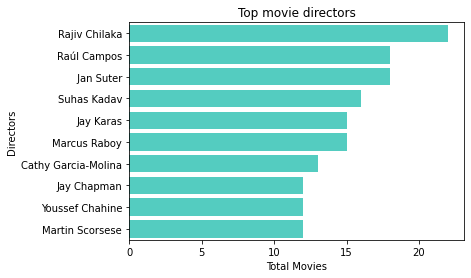

In [ ]:
# Visualising the top movie directors
sns.barplot(y='Directors', x='Total Movies', data=top_directors, color='turquoise')
plt.title('Top movie directors');

In [ ]:
# This shows that the top movie director is Rajiv Chilaka

## Movie durations distribution

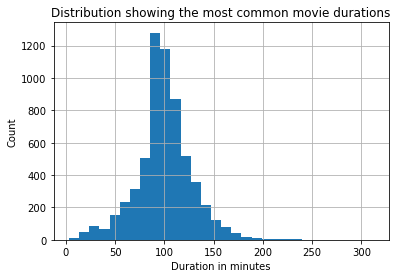

In [ ]:
netflix_movie['duration'].hist(bins=30)
plt.xlabel('Duration in minutes')
plt.ylabel('Count')
plt.title('Distribution showing the most common movie durations');

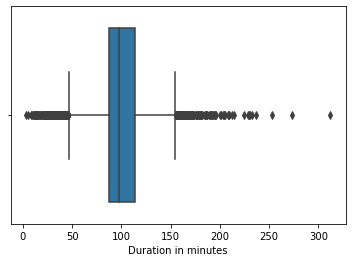

In [ ]:
# to show the outliers in the durations column
sns.boxplot(x='duration', data=netflix_movie)
plt.xlabel('Duration in minutes');

In [ ]:
#These plots show that most movies are between 80 to 100 minutes long

## Top movie countries

In [ ]:
# Expanding the countries to only include one country 
countries = netflix_movie['country'].str.split(',', expand=True).stack()
# removing the white sapces before and after country names to avoid duplicates
countries = countries.str.strip(' ')


In [ ]:
countries.value_counts()

United States     2749
India              962
United Kingdom     534
Not Specified      439
Canada             319
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Length: 119, dtype: int64

In [ ]:
top_countries = countries.value_counts().head(15)

In [ ]:
top_countries = pd.DataFrame(top_countries)
# renaming the column
top_countries.columns = ['Movies count']
top_countries

,Movies count
United States,2749
India,962
United Kingdom,534
Not Specified,439
Canada,319
France,303
Germany,182
Spain,171
Japan,119
China,114


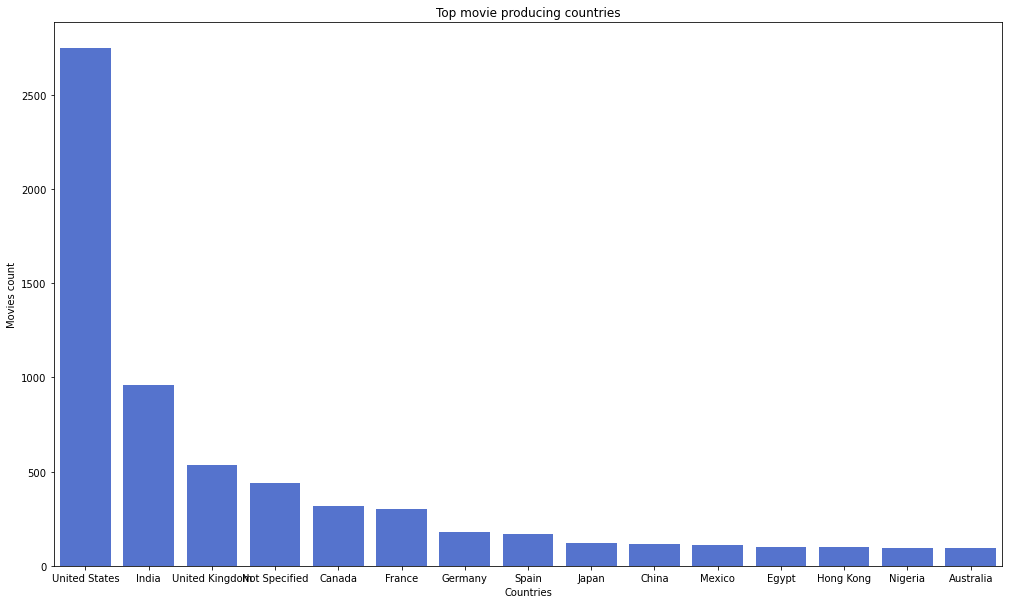

In [ ]:
# A bar plot to show the top movie producing countries
plt.figure(figsize=(17, 10))
sns.barplot(x=top_countries.index, y=top_countries['Movies count'], data=top_countries, color='royalblue')
plt.xlabel('Countries')
plt.title('Top movie producing countries');

In [ ]:
# This bar chart shows that United States is the largest movie producing country

## Top movie actors

In [ ]:
actors = netflix_movie['cast'].str.split(',', expand=True).stack()
actors = pd.DataFrame(actors)
actors.head()

0
0 0       Not Listed
6 0  Vanessa Hudgens
  1     Kimiko Glenn
  2    James Marsden
  3     Sofia Carson

In [ ]:
actors.columns = ['cast']

In [ ]:
actors = actors[actors['cast'] != 'Not Listed']
actors.head()

cast
6 0  Vanessa Hudgens
  1     Kimiko Glenn
  2    James Marsden
  3     Sofia Carson
  4       Liza Koshy

In [ ]:
# Selecting the top 15 actors
top_actors = actors.value_counts().head(10)
top_actors

cast             
 Anupam Kher         38
 Om Puri             27
 Rupa Bhimani        27
Shah Rukh Khan       26
 Paresh Rawal        25
 Boman Irani         25
 Julie Tejwani       24
Akshay Kumar         23
 Rajesh Kava         21
 Naseeruddin Shah    20
dtype: int64

In [ ]:
top_actors = pd.DataFrame(top_actors)
# renaming the column
top_actors.columns = ['Movies acted']
top_actors

,Movies acted
cast,
Anupam Kher,38
Om Puri,27
Rupa Bhimani,27
Shah Rukh Khan,26
Paresh Rawal,25
Boman Irani,25
Julie Tejwani,24
Akshay Kumar,23
Rajesh Kava,21


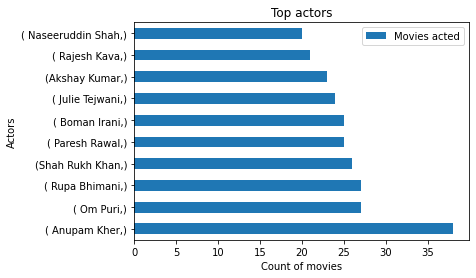

In [ ]:
# A horizontal bar chart to show the top movie actors
top_actors.plot(kind='barh')
plt.xlabel('Count of movies')
plt.ylabel('Actors')
plt.title('Top actors');

In [ ]:
# This bar plot shows that the top actor is Anupam Kher

## Release year

In [ ]:
netflix['release_year'].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
# Selecting two columns to perform a bi-variate analysis
netflix_release = netflix[['type','release_year']]
# Selecting the last 10 years
last_10_years = netflix_release[netflix['release_year'] >= 2012]
last_10_years

,type,release_year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8798,Movie,2014
8800,TV Show,2012
8801,Movie,2015
8803,TV Show,2018


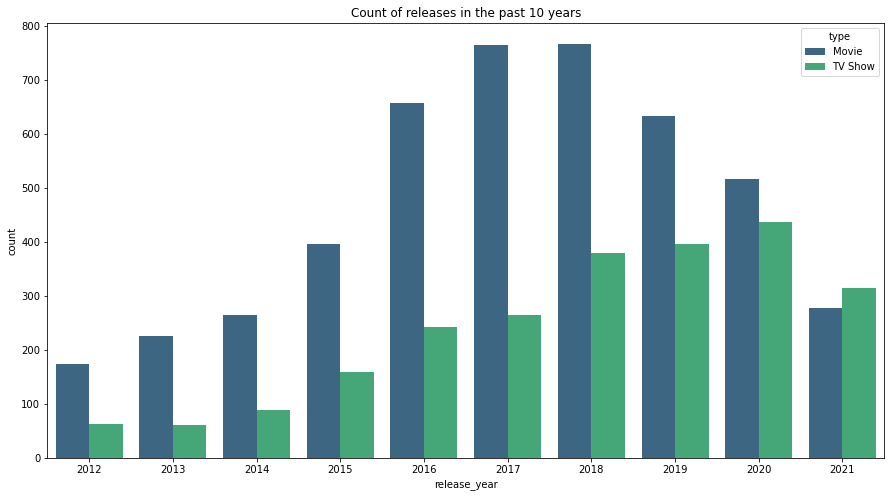

In [ ]:
# A bar plot showing the counts of movies and series produced in the last 10 years
plt.figure(figsize=(15, 8))
sns.countplot(x='release_year', data=last_10_years, hue='type', palette='viridis')
plt.title('Count of releases in the past 10 years');

In [ ]:
# this bar plot hows that the highest number of movies produced were in the years 2017 and 2018
# It also shows that the highest number of tv shows were produced in 2020

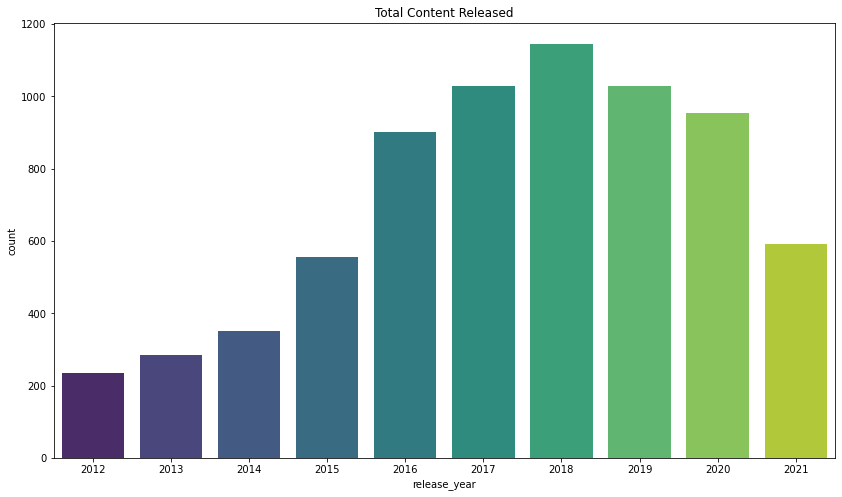

In [ ]:
# A count plot showing the total movies and Tv shows released
plt.figure(figsize=(14, 8))
sns.countplot(x='release_year', data=last_10_years, palette='viridis')
plt.title('Total Content Released');

In [ ]:
#This count plot shows that the year 2018 had the most content produced


## Directors with the longest movies

In [ ]:
longest_movies = netflix_movie[['director','duration']]
longest_movies= longest_movies[longest_movies['director'] != 'None Specified']

In [ ]:
directors_longest = longest_movies[longest_movies['duration'] > 210]

In [ ]:
directors_longest = directors_longest.set_index(['director'])

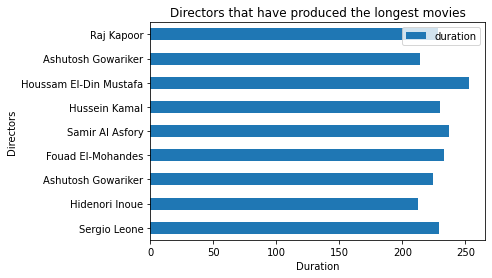

In [ ]:
directors_longest.plot(kind='barh')
plt.xlabel('Duration')
plt.ylabel('Directors')
plt.title('Directors that have produced the longest movies');

In [ ]:
# This plot shows the directors that have produced the longest movies

##  Ratings

In [ ]:
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
netflix['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [ ]:
# creating a dictionary to reorganise the ratings
new_categories = {
    'TV-PG': 'Parental Guidance',
    'TV-MA': 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'
}
netflix["rating"] = netflix['rating'].replace(new_categories)
netflix['rating'].value_counts()

Mature Audience      4089
Teens                3273
Parental Guidance     861
General Audience      567
Name: rating, dtype: int64

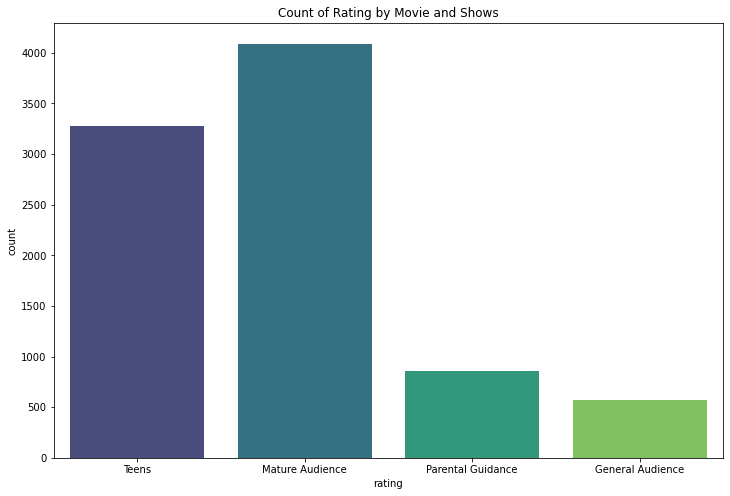

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="rating", data=netflix, palette="viridis")
plt.title("Count of Rating by Movie and Shows");

In [ ]:
# This shows that most of the content released are for mature audiences

## Longest movie ratings

In [ ]:
ratings = netflix[['rating', 'duration']]
ratings.value_counts()

rating             duration
Mature Audience    1           777
Teens              1           628
Parental Guidance  1           239
Mature Audience    2           190
General Audience   1           147
                              ... 
Mature Audience    312           1
                   229           1
                   209           1
                   208           1
Teens              253           1
Length: 610, dtype: int64

In [ ]:
# subsetting to only include the ratings with more than 210 minutes
longest_ratings = ratings[ratings['duration'] > 210]
# setting the index to the rating column
longest_ratings = longest_ratings.set_index(['rating'])
longest_ratings

,duration
rating,
Mature Audience,229
General Audience,273
Parental Guidance,212
Teens,224
Parental Guidance,233
Teens,237
Teens,230
Teens,253
Mature Audience,312


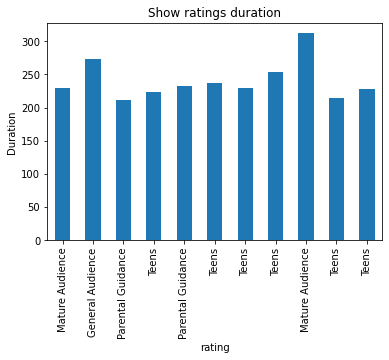

In [ ]:
longest_ratings['duration'].plot(kind='bar')
plt.ylabel('Duration')
plt.title('Show ratings duration');

In [ ]:
# This shows that mature audience rating has the longest movies

## Most popular genres

In [ ]:
# converting the column to a dataframe
#netflix['listed_in']  = pd.DataFrame(netflix['listed_in'])
# Splitting each genre to allow for accurate counting
genres = netflix['listed_in'].str.split(',', expand=True).stack()
# Sorting the values and picking the top 15
popular = genres.value_counts().sort_values(ascending=False).iloc[:15]
popular

 International Movies       2624
Dramas                      1599
Comedies                    1210
Action & Adventure           859
Documentaries                829
 Dramas                      827
International TV Shows       773
 Independent Movies          736
 TV Dramas                   695
 Romantic Movies             613
Children & Family Movies     605
 International TV Shows      576
 Thrillers                   512
 Comedies                    464
 TV Comedies                 454
dtype: int64

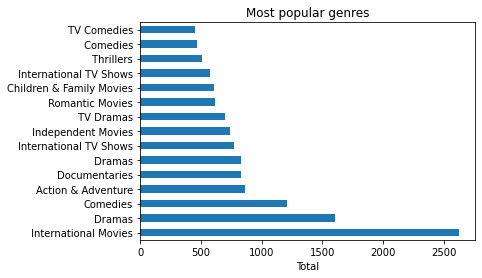

In [ ]:
popular.plot(kind='barh')
plt.xlabel('Total')
plt.title('Most popular genres');

In [ ]:
# This shows that the genre international movies is the most popular